In [83]:
import pandas
import numpy
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [84]:
names = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'label']

In [85]:
training = 'pendigits.tra'
training_data = pandas.read_csv(training, names=names)
training_data.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


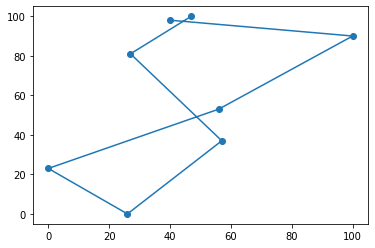

In [86]:
coor = training_data.drop('label', axis = 1).iloc[0].values.reshape(8, 2)
#plt.figure(figsize=(3, 3))
plt.plot(coor[:, 0], coor[:, 1], 'o-')
plt.show()

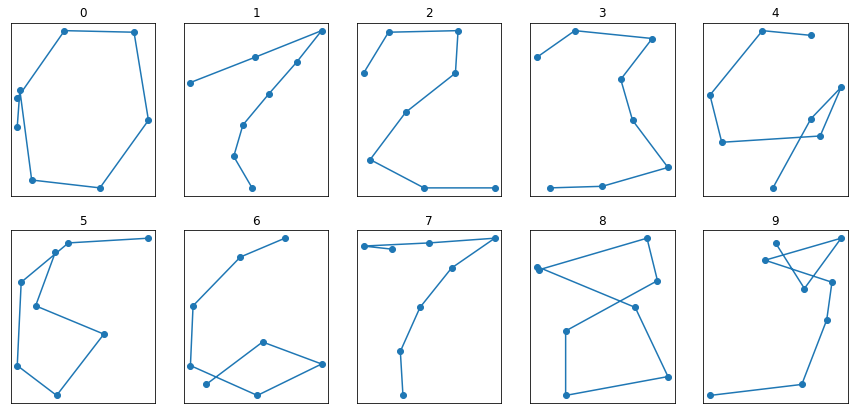

In [87]:
plt.figure(figsize=(15, 7))
for i in range(10):
    coor = training_data[training_data['label']==i].drop('label', axis = 1).iloc[i].values.reshape(8, 2)
    plt.subplot(2, 5, i+1)
    plt.plot(coor[:, 0], coor[:, 1], '-o')
    plt.xticks([])
    plt.yticks([])
    plt.title(i)
plt.show()

In [88]:
test = 'pendigits.tes'
test_data = pandas.read_csv(test, names = names)
test_data.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [89]:
train_feature = training_data.drop('label', axis = 1)
train_label = training_data['label']

In [90]:
train_feature

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100
7490,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0
7491,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5
7492,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0


In [91]:
test_feature = test_data.drop('label', axis = 1)
test_label = test_data['label']

# Initialize and Train Decision Tree

In [105]:
numpy.random.seed(0)
parameters = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1, 15)}
gs_tree = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv = 5)

In [106]:
model_tree = gs_tree.fit(train_feature, train_label)
model_tree.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [107]:
model_tree.refit_time_

0.02971029281616211

In [108]:
model_tree.score(train_feature, train_label)

0.9977315185481719

In [109]:
model_tree.score(test_feature, test_label)

0.9116638078902229

In [110]:
from joblib import dump, load

In [111]:
dump(model_tree, 'model_tree.joblib')

['model_tree.joblib']

# Initialize and Train KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
numpy.random.seed(0)
parameters = {'n_neighbors' : range(1, 10)}
gs_knn = GridSearchCV(KNeighborsClassifier(), parameters, cv = 5)

In [114]:
model_knn = gs_knn.fit(train_feature, train_label)
model_knn.best_params_

{'n_neighbors': 3}

In [115]:
model_knn.refit_time_

0.016743898391723633

In [116]:
model_knn.score(train_feature, train_label)

0.9971977582065652

In [117]:
model_knn.score(test_feature, test_label)

0.9779874213836478

In [118]:
dump(model_knn, 'model_knn.joblib')

['model_knn.joblib']

# Initialize and Train SVM

In [119]:
from sklearn import svm

In [120]:
numpy.random.seed(0)
parameters = {'C' : [0.1, 1.0, 10]}
gs_svm = GridSearchCV(svm.SVC(gamma='auto', kernel = 'linear'), parameters, cv = 5)

In [121]:
model_svm = gs_svm.fit(train_feature, train_label)
model_svm.best_params_

{'C': 0.1}

In [122]:
model_svm.refit_time_

0.6241505146026611

In [123]:
model_svm.score(train_feature, train_label)

0.9923939151321057

In [124]:
model_svm.score(test_feature, test_label)

0.9522584333905089

In [125]:
dump(model_svm, 'model_svm.joblib')

['model_svm.joblib']